# Potential Causes of  Fly-tipping Incidents in London 

Further interpretation/validation/analysis is in the report.
Not everything in the notebook was included in the report.

Key abbreviations:
FTI = fly-tipping incident,
NFTI = number of fly-tipping incidents,
PLGV = private or light goods vehicles,
TWC = total waste collected.

List of contents:
1. Analytical questions
2. Datasets
3. Cleaning fly-tipping dataset
4. Seperating fly-tipping data based on year
5. TWC vs NFTI
6. Inner vs Outer London Boroughs
7. PLGV vs NFTI
8. Landill tax vs NFTI
9. Socio-economic/demographic factors vs NFTI

# 1: Analytical Questions:

## Is there a relationship between the number of fly-tipping incidents (NFTI) and the waste collection provided by local authorities? Authorities can ascertain whether increasing waste collection would significantly decrease fly-tipping incidents.

## Is there a difference in the enforcement of measures against fly-tipping in Inner London boroughs compared to those in Outer London boroughs and does this impact the number of fly-tipping incidents?

## Is there a positive correlation between the number of vehicles registered in London and the NFTI?

## Do people fly-tip in the borough they live in?

## Does higher landfill tax lead to greater flytipping incidents?

## Is the number of fly-tipping incidents in a borough correlated to any of its demographic or socio-economic attributes?

# 2: Datasets:

## 1) The main dataset used is the 'Fly-tipping Incidents'. It contains the number of flytipping incidents and resulting actions taken in London Boroughs for each year from 2011-2020. This contains the main variable, 'total_incidents',  to be used throughout the investigation. This dataset is required for all analytical questions.

## Reference: "Fly-tipping Incidents – London Datastore", Data.london.gov.uk, 2021. [Online]. Available: https://data.london.gov.uk/dataset/fly-tipping-incidents. [Accessed: 19- Dec- 2021].

In [1]:
import pandas as pd
flytipping = open('flytipping.csv')
flytipping = pd.read_csv(flytipping)
flytipping.head()

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
0,E09000001,City of London,2011-12,527,563,149,182,3,0,0,0
1,E09000002,Barking and Dagenham,2011-12,"3,665","2,687",140,78,110,0,0,0
2,E09000003,Barnet,2011-12,"1,450","2,356",337,46,0,0,0,0
3,E09000004,Bexley Council,2011-12,980,505,0,36,0,0,0,19
4,E09000005,Brent,2011-12,"7,272","6,713",679,558,"1,100",28,0,11


## 2) The 'Local Authority Collected Waste Management, London' was used to obtain the 'Total local authority collected waste' values for London from 2011 to 2020. As only 9 values were required (2011 - 2020), they were manually copied from excel. 

## Reference: "Local Authority Collected Waste Management, London – London Datastore", Data.london.gov.uk, 2021. [Online]. Available: https://data.london.gov.uk/dataset/local-authority-collected-waste-management-london. [Accessed: 19- Dec- 2021].

In [2]:
Waste_collection = pd.read_excel('la-collected-waste.xlsx', sheet_name='Annual')
Waste_collection.head()

,Unnamed: 0,Table 1: Local Authority Collected Waste Generation from 2000/01 to 2019/20,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,London,Household waste from:,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07r,2007/08,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,NaN
1,NaN,Regular household collection,2231,2262,2216,2201,2081,2112,2111,2013,...,1598,1596,1623,1654,1673,1677,1637,1632,1612,NaN
2,NaN,Other household waste,336,310,298,274,306,277,256,247,...,239,207,234,238,276,225,219,208,209,NaN
3,NaN,Household civic amenity site waste,520,519,497,411,328,250,246,230,...,133,147,133,143,144,141,139,141,132,NaN
4,NaN,Household recycling/comp/reuse,304,317,367,445,581,687,776,851,...,1012,1003,1021,1008,986,1006,988,993,984,NaN


## 3) The 'Number of Licensed Vehicles' dataset was used to obtain the number of 'private or lightgoods (PLG)' vehicles registered in each borough from 2011 to 2020.

## Reference: "Licensed Vehicles – Numbers, Borough – London Datastore", Data.london.gov.uk, 2021. [Online]. Available: https://data.london.gov.uk/dataset/licensed-vehicles-numbers-borough. [Accessed: 19- Dec- 2021].

In [3]:
#Sheets for each year
vehicles2011 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2011')
vehicles2011.head()

,Code,Area,PLG cars: Company,PLG cars: Private,PLG: Other Company,PLG: Other Private,Total PLG,Exempt Disabled: Cars,Exempt Disabled: Others
0,00AA,City of London,1305,1477,321,43,3146,45,2
1,00AB,Barking and Dagenham,1578,50984,2279,3602,58443,3075,153
2,00AC,Barnet,4915,127141,3387,5579,141022,3098,110
3,00AD,Bexley,2186,93068,4195,6551,106000,3536,239
4,00AE,Brent,4093,80636,5231,4245,94205,2822,58


## 4) The Historical Landfill Tax Data was Extracted manually from gov.uk.
## Reference:  "Current and historic Landfill Tax rates", GOV.UK, 2021. [Online]. Available: https://www.gov.uk/government/statistics/landfill-tax-bulletin/current-and-historic-lft-rates. [Accessed: 19- Dec- 2021].

## 5) The 'london-borough-profiles' dataset contains socio-economic and demographic attributes for each London borough. Attributes were measured in various years, therefore, the dataset must be seperated into small datasets organised by year. 

## Reference: "London Borough Profiles and Atlas – London Datastore", Data.london.gov.uk, 2021. [Online]. Available: https://data.london.gov.uk/dataset/london-borough-profiles. [Accessed: 19- Dec- 2021].

In [4]:
f = open('london-borough-profiles.csv')
lbp = pd.read_csv(f)
lbp.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


## 6)The '2016 mid year estimates.xlsx' dataset contains London Borough Population statistics for 2012, 2013, 2014, 2015, 2016. This dataset will be used to invistagte the relationship between population and number of incidents; this will provide insight into whether the number of incidents in a borough should be normalised with respect to population before comparisons between boroughs.

## Reference: "2016 Mid-Year Estimates – London Datastore", Data.london.gov.uk, 2021. [Online]. Available: https://data.london.gov.uk/dataset/2016-mid-year-estimates. [Accessed: 19- Dec- 2021].

In [5]:
population = pd.read_excel('populationestimates.xlsx' , sheet_name= 'table population')
population.head()

,district,2012,2013,2014,2015,2016,Unnamed: 6,2015-2016 change,Unnamed: 8,Unnamed: 9,Rank
0,City of London,7204.00000,6848.00000,6872.00000,7160.00000,7401.00000,NaN,241.0,0.033659,NaN,33.0
1,Barking and Dagenham,190948.53557,194740.53557,198682.53557,202367.53557,206848.53557,NaN,4481.0,0.022143,NaN,26.0
2,Barnet,364070.57371,369202.57371,375029.57371,379805.57371,386197.57371,NaN,6392.0,0.016830,NaN,1.0
3,Bexley,234499.39524,236915.39524,240093.39524,242370.39524,244988.39524,NaN,2618.0,0.010802,NaN,24.0
4,Brent,315498.87375,318102.87375,321600.87375,324850.87375,329092.87375,NaN,4242.0,0.013058,NaN,6.0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 3: Cleaning the fly-tipping datset (Missing/Anomalous Values)

In [7]:
#'flytipping' is main dataset used, has information about the number of incidents and actions taken for each
# borough from 2011 to 2020
flytipping = open('flytipping.csv')
flytipping = pd.read_csv(flytipping)
flytipping.head()

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
0,E09000001,City of London,2011-12,527,563,149,182,3,0,0,0
1,E09000002,Barking and Dagenham,2011-12,"3,665","2,687",140,78,110,0,0,0
2,E09000003,Barnet,2011-12,"1,450","2,356",337,46,0,0,0,0
3,E09000004,Bexley Council,2011-12,980,505,0,36,0,0,0,19
4,E09000005,Brent,2011-12,"7,272","6,713",679,558,"1,100",28,0,11


## 3.1: Identify the missing values

In [8]:
#isna().sum() states their are no missing values, however, visual inspection of the dataset shows absence of 
#numeric values for certain boroughs in certain years.
print(flytipping.isna().sum())

code                     0
area                     0
year                     0
total_incidents          0
total_action_taken       0
warning_letters          0
fixed_penalty_notices    0
statutory_notices        0
formal_cautions          0
injunctions              0
prosecutions             0
dtype: int64


In [9]:
#Therefore, first remove commas seperating numbers, then convert all column that are measurements to the 
#numeric datatype and finally re-search for missing values.



numeric_colums = ['total_incidents', 'total_action_taken', 'warning_letters', 'fixed_penalty_notices', 'statutory_notices', 'formal_cautions', 'injunctions', 'prosecutions']
for i in numeric_colums:
    flytipping[i] = flytipping[i].replace(',','', regex=True)
    flytipping[i] = pd.to_numeric(flytipping[i], errors ='coerce')

   
flytipping.isna().sum()


code                     0
area                     0
year                     0
total_incidents          2
total_action_taken       1
warning_letters          2
fixed_penalty_notices    2
statutory_notices        2
formal_cautions          2
injunctions              2
prosecutions             2
dtype: int64

In [10]:
#Small total missing values (15), therefore they will be dealth with individually.
#View each row individually
flytipping[flytipping['total_incidents'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
223,E09000026,Redbridge,2017-18,NaN,5670.0,889.0,523.0,607.0,435.0,0.0,16.0
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
flytipping[flytipping['total_action_taken'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
flytipping[flytipping['warning_letters'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
flytipping[flytipping['fixed_penalty_notices'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
flytipping[flytipping['statutory_notices'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
flytipping[flytipping['formal_cautions'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
flytipping[flytipping['injunctions'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
flytipping[flytipping['prosecutions'].isna()]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
256,E09000026,Redbridge,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 3 rows with missing values: Redbridge 2017-18, Redbridge 2018-19 and Hillingdon 2014-15

## 3.2 Addressing Redbridge 2017-2018 missing 'total_incidents' value

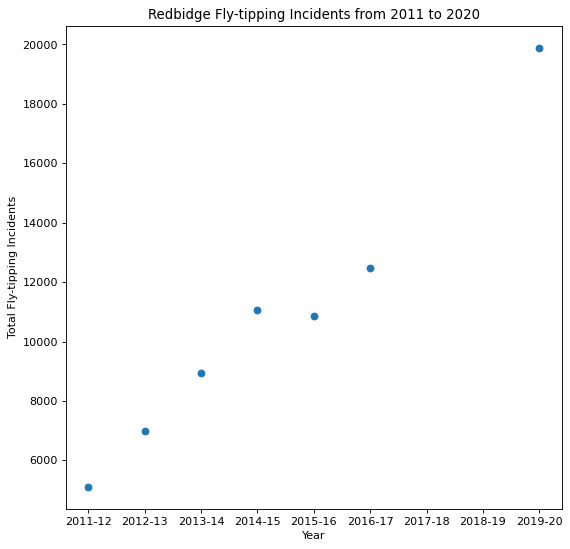

In [18]:
plt.figure(figsize=(8, 8), dpi=80)
Figure1 = plt.scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['total_incidents'][flytipping['area'] == 'Redbridge'])
plt.title('Redbidge Fly-tipping Incidents from 2011 to 2020')
plt.xlabel('Year')
plt.ylabel('Total Fly-tipping Incidents')
plt.savefig("Redbridge_missing.png")

In [19]:
#Apart from a decrease at 2015-2016, the number of incidents appears to be increasing at a linearly, therefore 
#linear interpolation will be used to generate an estimated value.
#the missing 2018-19 'total_incidents' value will also be replaced in this method.
flytipping['total_incidents'][flytipping['area'] == 'Redbridge'].interpolate()
#Index 223 refers to Redbridge 2017-18 and 256 to Redbridge 2018-19

25      5110.000000
58      6986.000000
91      8939.000000
124    11066.000000
157    10864.000000
190    12461.000000
223    14939.666667
256    17418.333333
289    19897.000000
Name: total_incidents, dtype: float64

In [20]:
#Update dataframe with generated values.
flytipping.at[223, 'total_incidents'] = 14940
flytipping.at[256, 'total_incidents'] = 17418

## 3.3 Addressing Redbridge 2018/2019  and Hillingdon 2014/2015 missing values
Both boroughs are missing several values, Redbridge in 2018/2019 and Hillingdon 2014/2015. Following inspection of the dataset source, it is still unclear why these values are missing. One solution would be to remove the rows.
However, there are only 32 boroughs, thus, with limited instances, it would be preferable to replace those missing values.

### 3.31 Redbridge 2018/2019
The following section discusses the approaches for replacing the missing values of each attribute.
The 'total_incidents' value was previously replaced in section 3.2. The data for Redbridge over time is visualised to help decide the approach to replace the values with.

Text(0, 0.5, 'Total Incidents')

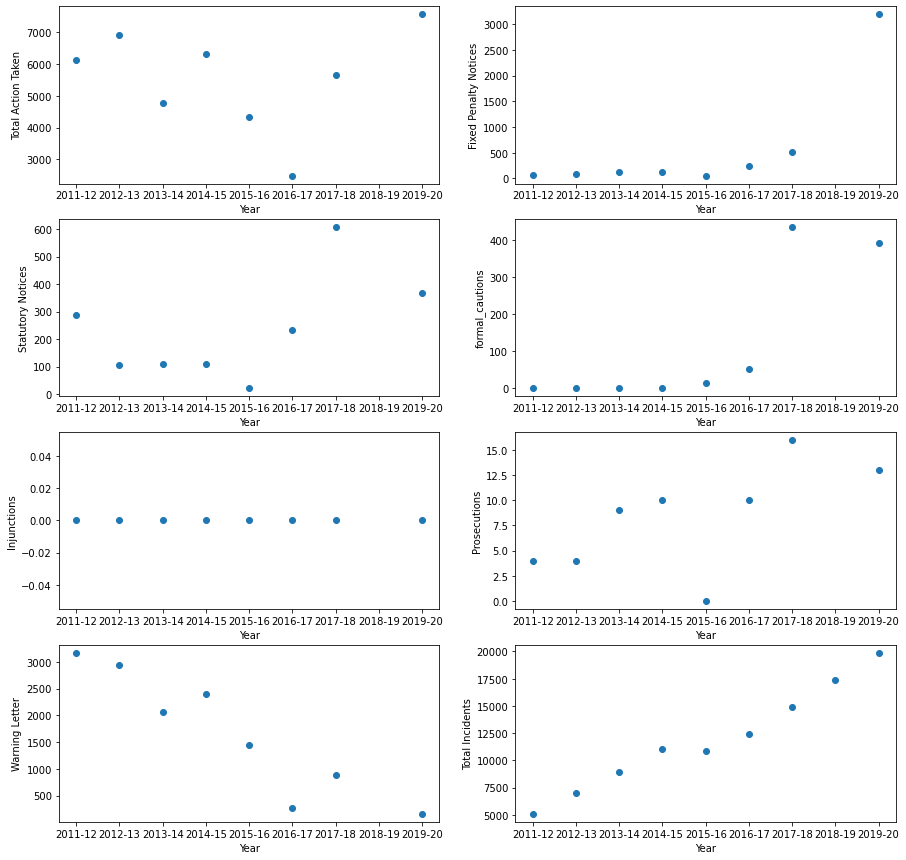

In [21]:
#Visualising each attribute of Redbridge over time to inform missing value replacement process.

fig, ax = plt.subplots(4,2, figsize=(15,15))
ax[0,0].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['total_action_taken'][flytipping['area'] == 'Redbridge'])
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel('Total Action Taken')

ax[0,1].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['fixed_penalty_notices'][flytipping['area'] == 'Redbridge'])
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel('Fixed Penalty Notices')


ax[1,0].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['statutory_notices'][flytipping['area'] == 'Redbridge'])
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel('Statutory Notices')

ax[1,1].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['formal_cautions'][flytipping['area'] == 'Redbridge'])
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel('formal_cautions')

ax[2,0].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['injunctions'][flytipping['area'] == 'Redbridge'])
ax[2,0].set_xlabel("Year")
ax[2,0].set_ylabel('Injunctions')

ax[2,1].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['prosecutions'][flytipping['area'] == 'Redbridge'])
ax[2,1].set_xlabel("Year")
ax[2,1].set_ylabel('Prosecutions')


ax[3,0].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['warning_letters'][flytipping['area'] == 'Redbridge'])
ax[3,0].set_xlabel("Year")
ax[3,0].set_ylabel('Warning Letter')

ax[3,1].scatter(flytipping['year'][flytipping['area'] == 'Redbridge'], flytipping['total_incidents'][flytipping['area'] == 'Redbridge'])
ax[3,1].set_xlabel("Year")
ax[3,1].set_ylabel('Total Incidents')


In [22]:
#Attributes which appear linear with respect to time have their missing values replaced using linear interpolation.
#This includes Injuctions and Warning Letters.
flytipping['warning_letters'][flytipping['area'] == 'Redbridge'].interpolate()

25     3172.0
58     2942.0
91     2069.0
124    2401.0
157    1447.0
190     277.0
223     889.0
256     526.0
289     163.0
Name: warning_letters, dtype: float64

In [23]:
flytipping.at[256, 'warning_letters'] = 526

In [24]:
flytipping['injunctions'][flytipping['area'] == 'Redbridge'].interpolate()

25     0.0
58     0.0
91     0.0
124    0.0
157    0.0
190    0.0
223    0.0
256    0.0
289    0.0
Name: injunctions, dtype: float64

In [25]:
flytipping.at[256, 'injunctions'] = 0

In [26]:
#Fixed penalty notices appeared to be exponentially increasing over time, therefore replaced with the local mean 
#the 2017/2018 and 2019/2020 values.
print(flytipping['fixed_penalty_notices'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2017-18')]) 
print(flytipping['fixed_penalty_notices'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2019-20')])
flytipping.at[256, 'fixed_penalty_notices'] = 1857

223    523.0
Name: fixed_penalty_notices, dtype: float64
289    3190.0
Name: fixed_penalty_notices, dtype: float64


In [27]:
#The remaining attributes are replaced with local mean of two neighbouring values - they have no clear pattern over time.
print(flytipping['total_action_taken'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2017-18')]) 
print(flytipping['total_action_taken'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2019-20')])
flytipping.at[256, 'total_action_taken'] = 6615

223    5670.0
Name: total_action_taken, dtype: float64
289    7560.0
Name: total_action_taken, dtype: float64


In [28]:
print(flytipping['statutory_notices'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2017-18')]) 
print(flytipping['statutory_notices'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2019-20')])
flytipping.at[256, 'statutory_notices'] = 488


223    607.0
Name: statutory_notices, dtype: float64
289    368.0
Name: statutory_notices, dtype: float64


In [29]:
print(flytipping['formal_cautions'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2017-18')]) 
print(flytipping['formal_cautions'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2019-20')])
flytipping.at[256, 'formal_cautions'] = 414



223    435.0
Name: formal_cautions, dtype: float64
289    392.0
Name: formal_cautions, dtype: float64


In [30]:
print(flytipping['prosecutions'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2017-18')]) 
print(flytipping['prosecutions'][(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2019-20')])

flytipping.at[256, 'prosecutions'] = 15

223    16.0
Name: prosecutions, dtype: float64
289    13.0
Name: prosecutions, dtype: float64


In [31]:
flytipping[(flytipping['area'] == 'Redbridge') & (flytipping['year'] == '2018-19')]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
256,E09000026,Redbridge,2018-19,17418.0,6615.0,526.0,1857.0,488.0,414.0,0.0,15.0


### 3.32 Hillingdon 2014/2015 

Text(0, 0.5, 'warning_letters')

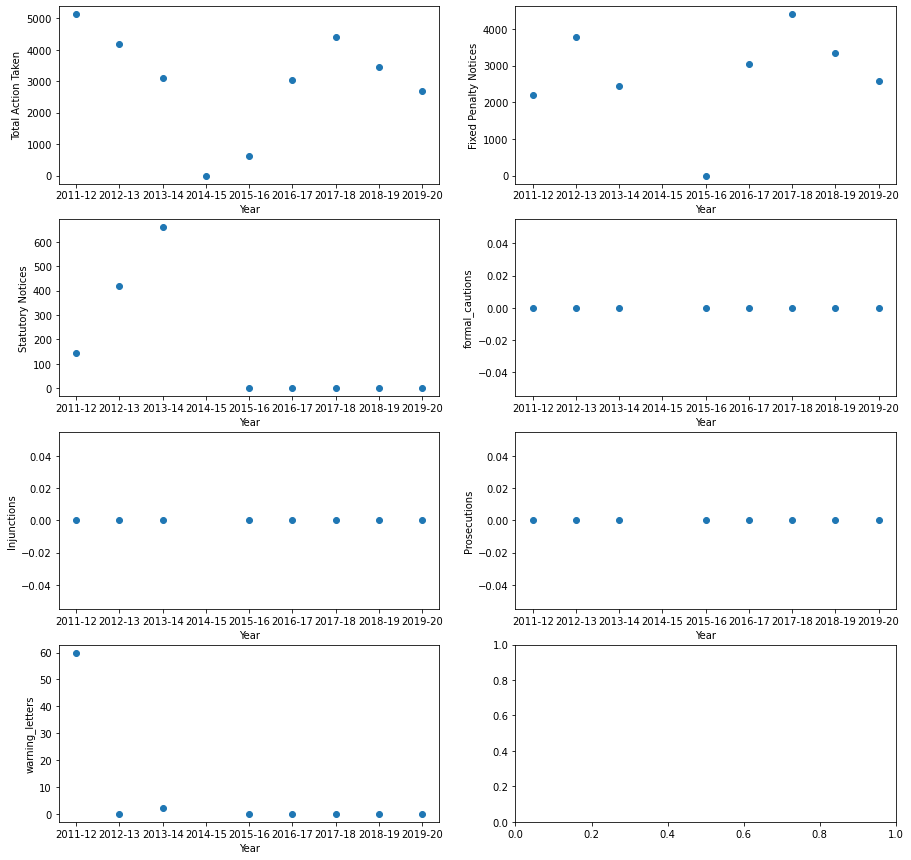

In [32]:
#Visualising each attribute over time to inform missing value replacement process.

fig1, ax1 = plt.subplots(4,2, figsize=(15,15))
ax1[0,0].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['total_action_taken'][flytipping['area'] == 'Hillingdon'])
ax1[0,0].set_xlabel("Year")
ax1[0,0].set_ylabel('Total Action Taken')

ax1[0,1].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['fixed_penalty_notices'][flytipping['area'] == 'Hillingdon'])
ax1[0,1].set_xlabel("Year")
ax1[0,1].set_ylabel('Fixed Penalty Notices')


ax1[1,0].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['statutory_notices'][flytipping['area'] == 'Hillingdon'])
ax1[1,0].set_xlabel("Year")
ax1[1,0].set_ylabel('Statutory Notices')

ax1[1,1].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['formal_cautions'][flytipping['area'] == 'Hillingdon'])
ax1[1,1].set_xlabel("Year")
ax1[1,1].set_ylabel('formal_cautions')

ax1[2,0].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['injunctions'][flytipping['area'] == 'Hillingdon'])
ax1[2,0].set_xlabel("Year")
ax1[2,0].set_ylabel('Injunctions')

ax1[2,1].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['prosecutions'][flytipping['area'] == 'Hillingdon'])
ax1[2,1].set_xlabel("Year")
ax1[2,1].set_ylabel('Prosecutions')

ax1[3,0].scatter(flytipping['year'][flytipping['area'] == 'Hillingdon'], flytipping['warning_letters'][flytipping['area'] == 'Hillingdon'])
ax1[3,0].set_xlabel("Year")
ax1[3,0].set_ylabel('warning_letters')

In [33]:
#Based on the trends of each attribute, it appears the values tend toward 0 for 2014-15 and could potentially be
#why no value was recorded for these attributes. These missing values were replaced with 0.
flytipping.at[115, 'injunctions'] = 0
flytipping.at[115, 'prosecutions'] = 0
flytipping.at[115, 'formal_cautions'] = 0
flytipping.at[115, 'statutory_notices'] = 0
flytipping.at[115, 'fixed_penalty_notices'] = 0
flytipping.at[115, 'warning_letters'] = 0

In [34]:
flytipping[(flytipping['area'] == 'Hillingdon') & (flytipping['year'] == '2014-15')]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
115,E09000017,Hillingdon,2014-15,1817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.4  Anomalous Results: For some boroughs, there are 0 incidents recorded however, there are still actions taken recorded

In [35]:
#As actions have been taken against flytipping, this suggest the total incidents value isn't
#actually 0 and this is a missing value.
#These boroughs have their total incidents value replace with the mean value of total incidents in that borough 
#over the other years.
#Searching for them:

flytipping[(flytipping['total_incidents'] == 0) & (flytipping['total_action_taken'] > 0)]


,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
139,E09000008,Croydon,2015-16,0.0,1707.0,14.0,928.0,48.0,0.0,0.0,73.0
164,E09000033,Westminster,2015-16,0.0,3447.0,267.0,2789.0,0.0,0.0,0.0,0.0


In [36]:
flytipping.at[139, 'total_incidents'] = flytipping['total_incidents'][(flytipping['area'] == 'Croydon') & (flytipping['total_incidents'] > 0)].mean()
flytipping.at[164, 'total_incidents'] = flytipping['total_incidents'][(flytipping['area'] == 'Westminster') & (flytipping['total_incidents'] > 0)].mean()


In [37]:
flytipping[(flytipping['area'] == 'Croydon')& (flytipping['year'] == '2015-16')]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
139,E09000008,Croydon,2015-16,17409.25,1707.0,14.0,928.0,48.0,0.0,0.0,73.0


In [38]:
flytipping[(flytipping['area'] == 'Westminster')& (flytipping['year'] == '2015-16')]

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
164,E09000033,Westminster,2015-16,15220.25,3447.0,267.0,2789.0,0.0,0.0,0.0,0.0


# 4. Seperating each year in flytipping data into new dataframes as years will sometimes be used individually.

In [39]:
flytipping2011 =flytipping[flytipping['year']=='2011-12']
flytipping2012 =flytipping[flytipping['year']=='2012-13']
flytipping2013 =flytipping[flytipping['year']=='2013-14']
flytipping2014 =flytipping[flytipping['year']=='2014-15']
flytipping2015 =flytipping[flytipping['year']=='2015-16']
flytipping2016 =flytipping[flytipping['year']=='2016-17']
flytipping2017 =flytipping[flytipping['year']=='2017-18']
flytipping2018 =flytipping[flytipping['year']=='2018-19']
flytipping2019 =flytipping[flytipping['year']=='2019-20']
flytipping2015.head()

,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
132,E09000001,City of London,2015-16,627.0,587.0,0.0,58.0,104.0,0.0,0.0,0.0
133,E09000002,Barking and Dagenham,2015-16,2361.0,2672.0,855.0,620.0,473.0,0.0,0.0,9.0
134,E09000003,Barnet,2015-16,5999.0,615.0,16.0,11.0,108.0,0.0,0.0,3.0
135,E09000004,Bexley Council,2015-16,1110.0,262.0,39.0,12.0,0.0,0.0,0.0,1.0
136,E09000005,Brent,2015-16,13198.0,3980.0,296.0,400.0,282.0,1.0,1.0,17.0


# 5. Checking relationship between yearly waste collection and mean total flytipping incidents for a borough


Waste_collection data contains the total yearly waste collected (in 1000s Tonnes) by local authorities in London. 
It does not have values for individual boroughs, but rather the total across all boroughs.
Tbe total authority collected waste from 2011-2020 was manually copied into the notebook; there were only 9 values, therefore it was quicker to copy and paste from the excel document.
A new dataframe was created, with total waste collected data and mean borough total flytipping incidents.


In [40]:
Waste_collection = pd.read_excel('la-collected-waste.xlsx', sheet_name='Annual')

Wastecollected = [3619, 3560, 3632, 3658, 3698, 3697, 3611, 3611, 3593]
years = ['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20']
Flytipping_means = [flytipping2011['total_incidents'].mean(), flytipping2012['total_incidents'].mean(),flytipping2013['total_incidents'].mean(), flytipping2014['total_incidents'].mean(), flytipping2015['total_incidents'].mean(),flytipping2016['total_incidents'].mean(),flytipping2017['total_incidents'].mean(),flytipping2018['total_incidents'].mean(),flytipping2019['total_incidents'].mean()]


#WasteCollectedandFlytippingIncidents = WCandFTI
WCandFTI = {'year': years, 'Mean_flytipping': Flytipping_means, 'waste_collected': Wastecollected }
WCandFTI = pd.DataFrame.from_dict(WCandFTI)
WCandFTI.head()

,year,Mean_flytipping,waste_collected
0,2011-12,7023.515152,3619
1,2012-13,7027.090909,3560
2,2013-14,9923.757576,3632
3,2014-15,11123.484848,3658
4,2015-16,10689.893939,3698


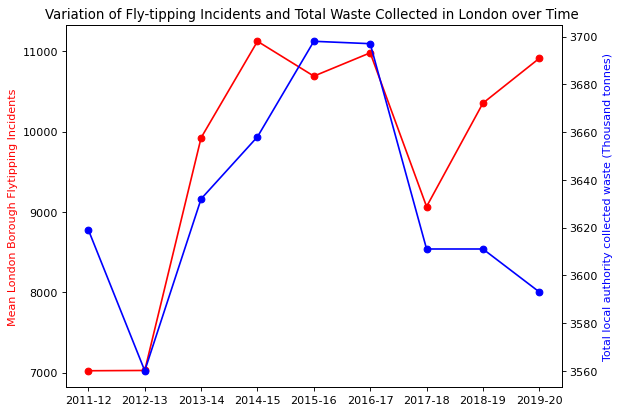

In [41]:
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(WCandFTI.year, WCandFTI.Mean_flytipping,color= 'red', marker="o")
ax2=ax.twinx()
ax2.plot(WCandFTI.year, WCandFTI.waste_collected,color="blue",marker="o")
ax.set_ylabel('Mean London Borough Flytipping Incidents', color="red")
ax2.set_ylabel('Total local authority collected waste (Thousand tonnes)',color="blue")
plt.title('Variation of Fly-tipping Incidents and Total Waste Collected in London over Time ')
fig.savefig('TWCvsFTI')

If fly-tipping waste collected was included in TWC, changes in NFTI would also impact the TWC, not just TWC impacting NFTI. Additionally, TWC is measured in mass, while NFTI does not consider the mass of waste when an FTI is recorded.
This could be further validated by investigating the same relationship in other cities in England.

# 6: Normalise number of flytipping incidents with respect to population?

## Checking if the number of total flytipping incidents was significantly correlated to population, if so the number of flytipping incidents would be normalised with respect to population when investigating the relationships bewteen flytipping incidents other attributes

In [42]:
population = pd.read_excel('populationestimates.xlsx' , sheet_name= 'table population')

#The dataset 'populationestimates.xlse' only has population information for 2012, 2013, 2014,2015,2016



#rename district to Area to allow merging of the flytippingyear and population dataframes.
population = population.rename(columns={"district": "area"})
merged_2012 = pd.merge(flytipping2012, population, on='area')
merged_2013 = pd.merge(flytipping2013, population, on='area')
merged_2014 = pd.merge(flytipping2014, population, on='area')
merged_2015 = pd.merge(flytipping2015, population, on='area')
merged_2016 = pd.merge(flytipping2016, population, on='area')






Text(0, 0.5, 'total_incidents')

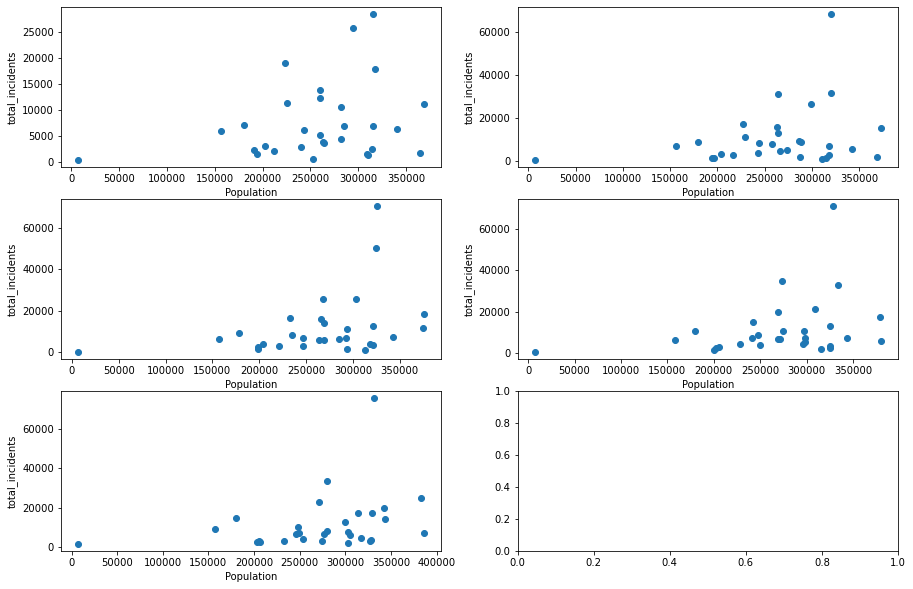

In [43]:
fig3, ax3 = plt.subplots(3,2, figsize=(15,10))

ax3[0,0].scatter(merged_2012[2012], merged_2012['total_incidents'])
ax3[0,0].set_xlabel('Population')
ax3[0,0].set_ylabel('total_incidents')

ax3[0,1].scatter(merged_2013[2013], merged_2013['total_incidents'])
ax3[0,1].set_xlabel('Population')
ax3[0,1].set_ylabel('total_incidents')

ax3[1,0].scatter(merged_2014[2014], merged_2014['total_incidents'])
ax3[1,0].set_xlabel('Population')
ax3[1,0].set_ylabel('total_incidents')

ax3[1,1].scatter(merged_2015[2015], merged_2015['total_incidents'])
ax3[1,1].set_xlabel('Population')
ax3[1,1].set_ylabel('total_incidents')

ax3[2,0].scatter(merged_2016[2016], merged_2016['total_incidents'])
ax3[2,0].set_xlabel('Population')
ax3[2,0].set_ylabel('total_incidents')



To make the relationship clearer, I will use Spearman's rank rather than Pearson's Correlation as there appears to be outliers and Spearman's rank is more robust against outliers. Also, it is unclear if there is a linear relationship or not.

In [44]:
#https://moodle.city.ac.uk/mod/page/view.php?id=2048787
from scipy import stats
corrSpearman2012, pValSpearman2012 = stats.spearmanr(merged_2012['total_incidents'],merged_2012[2012])
print ('2012 :', "Spearman's correlation is", corrSpearman2012, "with a p-value of",pValSpearman2012)
corrSpearman2013, pValSpearman2013 = stats.spearmanr(merged_2013['total_incidents'],merged_2013[2013])
print ('2013 :', "Spearman's correlation is", corrSpearman2013, "with a p-value of",pValSpearman2013)
corrSpearman2014, pValSpearman2014 = stats.spearmanr(merged_2014['total_incidents'],merged_2014[2014])
print ('2014 :', "Spearman's correlation is", corrSpearman2014, "with a p-value of",pValSpearman2014)
corrSpearman2015, pValSpearman2015 = stats.spearmanr(merged_2015['total_incidents'],merged_2015[2015])
print ('2015 :', "Spearman's correlation is", corrSpearman2015, "with a p-value of",pValSpearman2015)
corrSpearman2016, pValSpearman2016 = stats.spearmanr(merged_2016['total_incidents'],merged_2016[2016])
print ('2016 :', "Spearman's correlation is", corrSpearman2016, "with a p-value of",pValSpearman2016)



2012 : Spearman's correlation is 0.24449388209121245 with a p-value of 0.19287803716174856
2013 : Spearman's correlation is 0.20756395995550608 with a p-value of 0.2710674889001301
2014 : Spearman's correlation is 0.4291434927697442 with a p-value of 0.017959903895677483
2015 : Spearman's correlation is 0.34015572858731924 with a p-value of 0.06588236359826605
2016 : Spearman's correlation is 0.4362625139043382 with a p-value of 0.01594728329109038


For 2/5 of the years, p-value suggests significance of population on the number of incidents. This is inconclusive and does not confirm a relationship. When using fly-tipping data for an individual year and comparing boroughs, normalisation will be considered based on Spearman's correlation for that year. When using fly-tipping data over multiple years, normalisation will not be considered. FUTURE WORK: Obtain population data for 2011-2019 and investigate correlation over all years to get more conclusive answer about whether to normalise.



# 7: Is there a difference between how Inner and Outer London boroughs punish flytipping, and does it relate to the mean number of inicidents in a borough?

In [45]:
#Resave the flytipping dataframe as a csv, and insert a new column called inner/outer which classifies 
#each borough as Inner or Outer London. Then reload the file.
flytipping.to_csv('flytipping2.csv')
f = open('flytippingupdate.csv')
flytipping2 = pd.read_csv(f)
flytipping2[['area','year', 'Inner/Outer']]


,area,year,Inner/Outer
0,City of London,2011-12,Inner London
1,Barking and Dagenham,2011-12,Outer London
2,Barnet,2011-12,Outer London
3,Bexley Council,2011-12,Outer London
4,Brent,2011-12,Outer London
...,...,...,...
292,Sutton,2019-20,Outer London
293,Tower Hamlets,2019-20,Inner London
294,Waltham Forest,2019-20,Outer London
295,Wandsworth,2019-20,Inner London


In [46]:
flytipping_inner = flytipping2[flytipping2['Inner/Outer']=='Inner London']
flytipping_outer = flytipping2[flytipping2['Inner/Outer']=='Outer London']

Mean total flytipping incidents in inner London boroughs:  11112.208333333334
Mean total flytipping incidents in outer London boroughs:  8635.229532163743


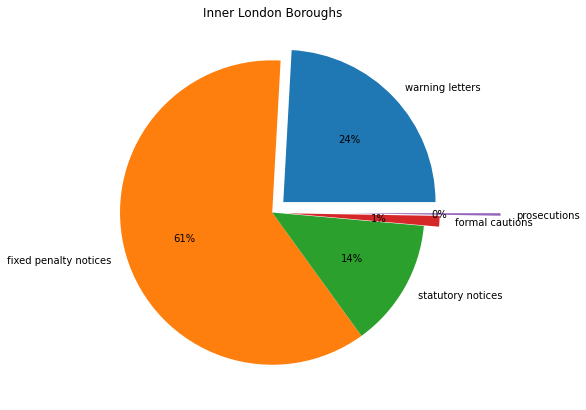

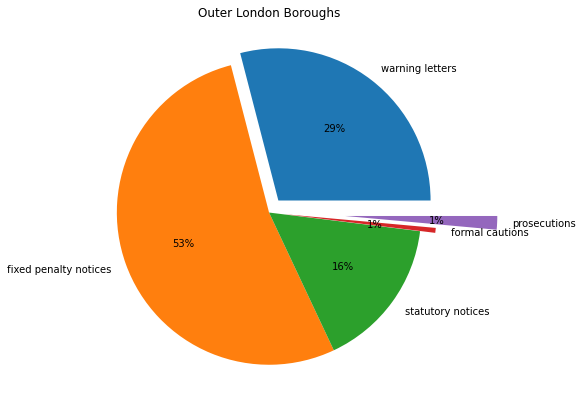

In [47]:
#Work out mean value for each enforcement action for inner and outer London boroughs.
inner_means = [flytipping_inner['warning_letters'].mean(), flytipping_inner['fixed_penalty_notices'].mean(), flytipping_inner['statutory_notices'].mean(), flytipping_inner['formal_cautions'].mean(), flytipping_inner['prosecutions'].mean()]
outer_means = [flytipping_outer['warning_letters'].mean(), flytipping_outer['fixed_penalty_notices'].mean(), flytipping_outer['statutory_notices'].mean(), flytipping_outer['formal_cautions'].mean(), flytipping_outer['prosecutions'].mean()] 
labels = ['warning letters', 'fixed penalty notices', 'statutory notices', 'formal cautions', 'prosecutions']
explode = [0.1, 0, 0, 0.1, 0.5]
#Mean number of injunctions for each group is negligible, therefore, it is not included.

fig = plt.figure(figsize =(10, 7))
plt.pie(inner_means, labels = labels, autopct='%1.0f%%', explode = explode)
print('Mean total flytipping incidents in inner London boroughs: ',flytipping_inner['total_incidents'].mean())
plt.title('Inner London Boroughs')
plt.savefig('InnerFTI.png')

fig = plt.figure(figsize =(10, 7))
plt.pie(outer_means, labels = labels, autopct='%1.0f%%', explode = explode)
print('Mean total flytipping incidents in outer London boroughs: ',flytipping_outer['total_incidents'].mean())
plt.title('Outer London Boroughs')
plt.savefig('OuterFTI.png')




Not a significant difference in how flytipping is punished in Inner and Outer London. However, the mean number of flytipping incidents in Inner London is significantly higher, suggesting there are other factors effecting the number of incidents. There is a low number of prosecutions due to lack of evidence ([6] in report), increased surveillence could increase prosecutions which could deter fly-tipping.

# 8: Is the number of flytipping tipping incidents related to the total private/light goods vehicles (PLGV) registered in a borough and do people fly-tip in their own borough?

In [48]:
vehicles2019 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2019')
#remove first empty row of NaNs and summary rows at the end of the document (e.g. remove inner London summary values)
#for each sheet.
#performed on excel.
vehicles2019.head()

,code,Area,PLG Cars:Company,PLG Cars:Private,PLG Other:Company,PLG Other:Private,PLG Total,Exempt Disabled: Cars,Exempt Disabled: Other
0,00AA,City of London,846,1251,312,46,2455,84,7
1,00AB,Barking and Dagenham,2196,59929,2818,3632,68575,2428,204
2,00AC,Barnet,5352,132403,4418,5321,147494,3243,122
3,00AD,Bexley,2557,99767,4190,6008,112522,2806,203
4,00AE,Brent,5288,83216,4851,3993,97348,2869,61


In [49]:
vehicles2011 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2011')
vehicles2012 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2012')
vehicles2013 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2013')
vehicles2014 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2014')
vehicles2015 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2015')
vehicles2016 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2016')
vehicles2017 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2017')
vehicles2018 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2018')
vehicles2019 = pd.read_excel('vehicles-licensed-borough.xls' , sheet_name= '2019')

First the variation of the mean total PLG vehicles registered in a borough to the variation mean number of flytipping incidents from 2011 to 2020 were compared. 

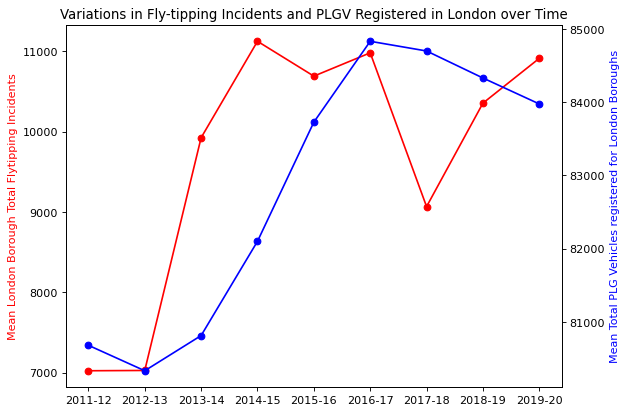

In [50]:
#Calculate the mean number of vehicles for a borough over each year
mean_total_vehicles = [vehicles2011['Total PLG'].mean(), vehicles2012['Total PLG'].mean(),vehicles2013['Total PLG'].mean(), vehicles2014['Total PLG'].mean(),vehicles2015['Total PLG'].mean(),vehicles2016['Total PLG'].mean(),vehicles2017['Total PLG'].mean(),vehicles2018['Total PLG'].mean(),vehicles2019['PLG Total'].mean()]
years = ['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20']
Flytipping_means = [flytipping2011['total_incidents'].mean(), flytipping2012['total_incidents'].mean(),flytipping2013['total_incidents'].mean(), flytipping2014['total_incidents'].mean(), flytipping2015['total_incidents'].mean(),flytipping2016['total_incidents'].mean(),flytipping2017['total_incidents'].mean(),flytipping2018['total_incidents'].mean(),flytipping2019['total_incidents'].mean()]
#VehiclesandFlytippingIncidents = VandFTI
VandFTI = {'year': years, 'Mean_flytipping': Flytipping_means, 'mean_total_vehicles': mean_total_vehicles }
VandFTI=pd.DataFrame.from_dict(VandFTI)

fig,ax=plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(VandFTI.year, VandFTI.Mean_flytipping,color= 'red', marker="o")
ax2=ax.twinx()
ax2.plot(VandFTI.year, VandFTI.mean_total_vehicles,color="blue",marker="o")
ax.set_ylabel('Mean London Borough Total Flytipping Incidents', color="red")
ax2.set_ylabel('Mean Total PLG Vehicles registered for London Boroughs',color="blue")
plt.title('Variations in Fly-tipping Incidents and PLGV Registered in London over Time')
fig.savefig('FTI vs PLGV')
       


### Now I will investigate the relationship between vehicles registered in a borough and number of fly-tipping incidents in that borough

2011 corr:  -0.009566184649610678 p-value:  0.9599862888364576
2012 corr:  0.08342602892102337 p-value:  0.661174334820857
2013 corr:  -0.029588431590656286 p-value:  0.876655812413733
2014 corr:  0.08698553948832036 p-value:  0.6476258966269068
2015 corr:  0.13993325917686317 p-value:  0.46080677886565224
2016 corr:  0.2587319243604005 p-value:  0.16741512564102473
2017 corr:  0.00867630700778643 p-value:  0.9637059421012134
2018 corr:  0.013125695216907676 p-value:  0.9451166719944468
2019 corr:  -0.0135706340378198 p-value:  0.943259139365723


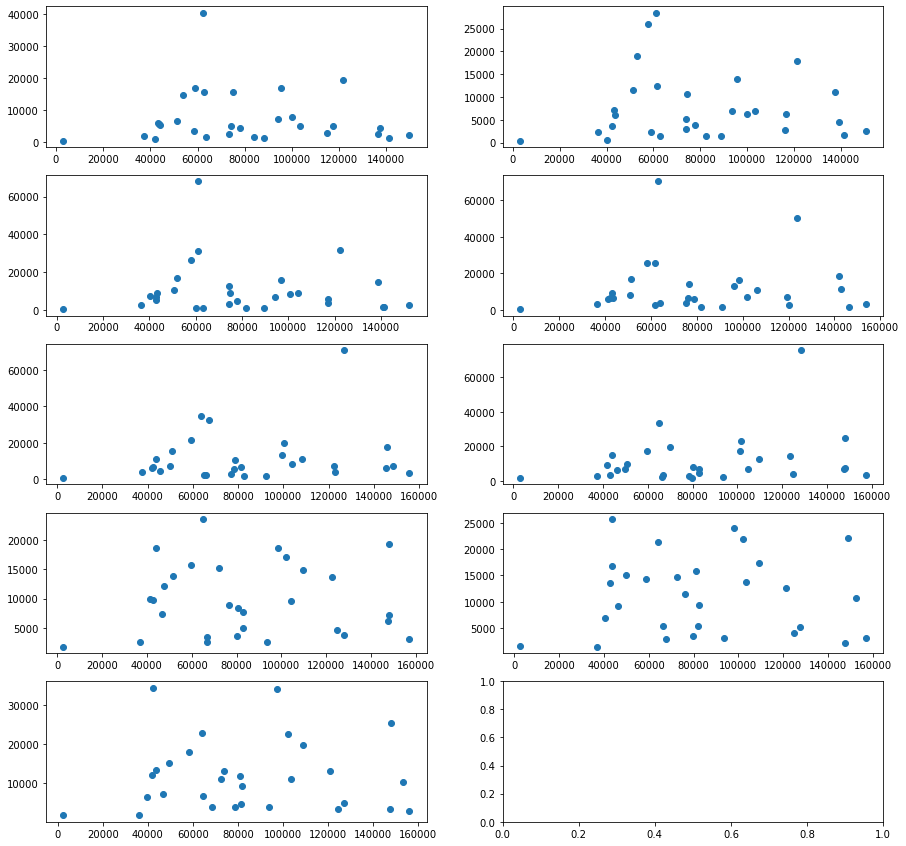

In [51]:
#Make scatter plots of total PLG vs incidents for each year after combining the flytipping and vehicles datasets.
from scipy import stats
#Renaming column to allow merging
flytipping2011 = flytipping2011.rename(columns={"area": "Area"})
flytipping2012 = flytipping2012.rename(columns={"area": "Area"})
flytipping2013 = flytipping2013.rename(columns={"area": "Area"})
flytipping2014 = flytipping2014.rename(columns={"area": "Area"})
flytipping2015 = flytipping2015.rename(columns={"area": "Area"})
flytipping2016 = flytipping2016.rename(columns={"area": "Area"})
flytipping2017 = flytipping2017.rename(columns={"area": "Area"})
flytipping2018 = flytipping2018.rename(columns={"area": "Area"})
flytipping2019 = flytipping2019.rename(columns={"area": "Area"})


ftv2011 = pd.merge(flytipping2011, vehicles2011, on='Area')
ftv2012 = pd.merge(flytipping2012, vehicles2012, on='Area')
ftv2013 = pd.merge(flytipping2013, vehicles2013, on='Area')
ftv2014 = pd.merge(flytipping2014, vehicles2014, on='Area')
ftv2015 = pd.merge(flytipping2015, vehicles2015, on='Area')
ftv2016 = pd.merge(flytipping2016, vehicles2016, on='Area')
ftv2017 = pd.merge(flytipping2017, vehicles2017, on='Area')
ftv2018 = pd.merge(flytipping2018, vehicles2018, on='Area')
ftv2019 = pd.merge(flytipping2019, vehicles2019, on='Area')


fig7,ax7 = plt.subplots(5,2, figsize=(15,15))
ax7[0,0].scatter(ftv2011['Total PLG'], ftv2011['total_incidents'])
ax7[0,1].scatter(ftv2012['Total PLG'], ftv2012['total_incidents'])
ax7[1,0].scatter(ftv2013['Total PLG'], ftv2013['total_incidents'])
ax7[1,1].scatter(ftv2014['Total PLG'], ftv2014['total_incidents'])
ax7[2,0].scatter(ftv2015['Total PLG'], ftv2015['total_incidents'])
ax7[2,1].scatter(ftv2016['Total PLG'], ftv2016['total_incidents'])
ax7[3,0].scatter(ftv2017['Total PLG'], ftv2017['total_incidents'])
ax7[3,1].scatter(ftv2018['Total PLG'], ftv2018['total_incidents'])
ax7[4,0].scatter(ftv2019['PLG Total'], ftv2019['total_incidents'])
corrSpearman, pValSpearman = stats.spearmanr(ftv2011['Total PLG'],ftv2011['total_incidents'])
print ('2011', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2012['Total PLG'],ftv2012['total_incidents'])
print ('2012', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2013['Total PLG'],ftv2013['total_incidents'])
print ('2013', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2014['Total PLG'],ftv2014['total_incidents'])
print ('2014', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2015['Total PLG'],ftv2015['total_incidents'])
print ('2015', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2016['Total PLG'],ftv2016['total_incidents'])
print ('2016', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2017['Total PLG'],ftv2017['total_incidents'])
print ('2017', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2018['Total PLG'],ftv2018['total_incidents'])
print ('2018', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)
corrSpearman, pValSpearman = stats.spearmanr(ftv2019['PLG Total'],ftv2019['total_incidents'])
print ('2019', 'corr: ', corrSpearman, 'p-value: ',pValSpearman)


High p-values and low correlation suggests the number of vehicles registered and fly-tipping incidents in each borough are not related, a possible explanation could be that people don't flytip in their own borough. For example, Newham 2011 had the greatest number of incidents despite having less than the mean number of PLG vehicles resgistered.

In [52]:
ftv2011[ftv2011['total_incidents'] > 30000]

,code,Area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions,Code,PLG cars: Company,PLG cars: Private,PLG: Other Company,PLG: Other Private,Total PLG,Exempt Disabled: Cars,Exempt Disabled: Others
22,E09000025,Newham,2011-12,40499.0,9593.0,1.0,8876.0,234.0,0.0,0.0,0.0,00BB,1628,55522,1902,3427,62479,3502,109


In [53]:
ftv2011['Total PLG'].mean()

80329.36666666667

# 9) Is there a relationship between landfill tax and total incidents?

In [54]:
#https://www.gov.uk/government/statistics/landfill-tax-bulletin/current-and-historic-lft-rates
#Historic landfill tax from 2011-2020 from gov website

Standard_rates = [56, 64, 72, 80, 84.40, 86.10, 88.95, 91.35, 94.15]
years = ['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20']
Flytipping_means = [flytipping2011['total_incidents'].mean(), flytipping2012['total_incidents'].mean(),flytipping2013['total_incidents'].mean(), flytipping2014['total_incidents'].mean(), flytipping2015['total_incidents'].mean(),flytipping2016['total_incidents'].mean(),flytipping2017['total_incidents'].mean(),flytipping2018['total_incidents'].mean(),flytipping2019['total_incidents'].mean()]

#StandardRatesandFlytippingIncidents = SRandFTI
SRandFTI = {'year': years, 'Mean_flytipping': Flytipping_means, 'Standard_rates': Standard_rates }
SRandFTI=pd.DataFrame.from_dict(SRandFTI)
SRandFTI.head()

,year,Mean_flytipping,Standard_rates
0,2011-12,7023.515152,56.0
1,2012-13,7027.090909,64.0
2,2013-14,9923.757576,72.0
3,2014-15,11123.484848,80.0
4,2015-16,10689.893939,84.4


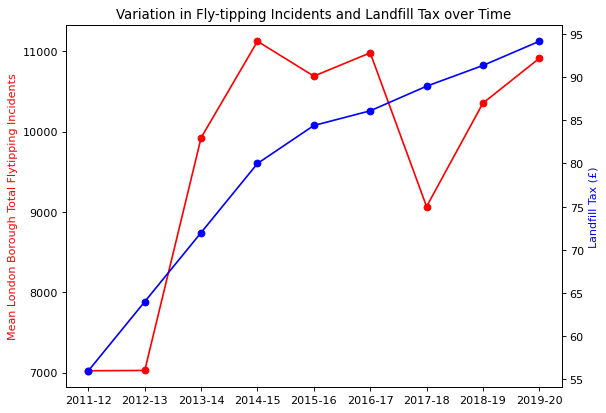

In [55]:
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(SRandFTI.year, SRandFTI.Mean_flytipping,color= 'red', marker="o")
ax2=ax.twinx()
ax2.plot(SRandFTI.year, SRandFTI.Standard_rates,color="blue",marker="o")
ax.set_ylabel('Mean London Borough Total Flytipping Incidents', color="red")
ax2.set_ylabel('Landfill Tax (£)',color="blue")
plt.title('Variation in Fly-tipping Incidents and Landfill Tax over Time')
plt.savefig('FTIvsLT')

<AxesSubplot:xlabel='Standard_rates'>

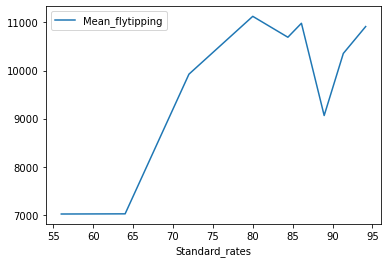

In [56]:
SRandFTI.plot('Standard_rates','Mean_flytipping')

From 2011 to 2015, as landfill tax increased, so did the number of flytipping incidents. However, when the rate of landfill tax increase slowed, the number of flytipping incidents remained relatively stable (excluding deviation in 2017-2018). This suggests as people saw bigger increases in landfill tax, they are more likely to start flytipping. The behaviour after 2015 suggests people are more likely to disregard small increase in landfill tax and continue proper waste disposal despite the increase in Landfill tax. Landill tax has been shown to contribute to fly-tipping ([6] in report) which further validates that this could be a causal relationship.

# 10: Is the number of flytipping incidents per capita correlated to socio-economic or demographic factors?

This dataset contained a large number of attributes of London boroughs, some of which were measured at different years.
Only attributes of interested were selected and new dataframes were created, seperating the attributes by years.

In [57]:
f = open('london-borough-profiles.csv')
lbp = pd.read_csv(f)


#Deal with missing values
lbp.isna().sum()

Code                                                         0
Area_name                                                    0
Inner/_Outer_London                                          5
GLA_Population_Estimate_2017                                 0
GLA_Household_Estimate_2017                                  0
                                                            ..
Political_control_in_council                                 0
Proportion_of_seats_won_by_Conservatives_in_2014_election    0
Proportion_of_seats_won_by_Labour_in_2014_election           0
Proportion_of_seats_won_by_Lib_Dems_in_2014_election         0
Turnout_at_2014_local_elections                              0
Length: 84, dtype: int64

In [58]:
lbp.columns[lbp.isnull().any()]

Index(['Inner/_Outer_London', 'Childhood_Obesity_Prevalance_(%)_2015/16',
       'People_aged_17+_with_diabetes_(%)'],
      dtype='object')

In [59]:
lbp['Inner/_Outer_London'].isna()
#Values with index 33-37 refer to summaries for inner/outer Londen, London, England United Kingdom
#They were removed.

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34     True
35     True
36     True
37     True
Name: Inner/_Outer_London, dtype: bool

In [60]:
lbp = lbp.drop(axis=0,labels= [lbp.index[33], lbp.index[34],lbp.index[35],lbp.index[36],lbp.index[37]])

### The remaining columns with missing values were unrelated to flytipping, therefore, were dropped.
       

In [61]:
lbp = lbp.drop(['Childhood_Obesity_Prevalance_(%)_2015/16', 'People_aged_17+_with_diabetes_(%)'], axis =1)

# 10.1 Investigating the correlation of fly-tipping with London borough attributes recorded in 2017

In [62]:
lbp_2017 = lbp[['Code', 'GLA_Population_Estimate_2017', 'Population_density_(per_hectare)_2017', 'Average_Age,_2017']]

In [63]:
lbp_2017.head()

,Code,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017"
0,E09000001,8800,30.3,43.2
1,E09000002,209000,57.9,32.9
2,E09000003,389600,44.9,37.3
3,E09000004,244300,40.3,39.0
4,E09000005,332100,76.8,35.6


In [64]:
#Merge flytipping data. Convert variables to numeric datatype.
flytipping2017 = flytipping2017.rename(columns={"code": "Code"})
merged_2017 = pd.merge(flytipping2017, lbp_2017, on='Code')
merged_2017['Population_density_(per_hectare)_2017'] = pd.to_numeric(lbp_2017['Population_density_(per_hectare)_2017'], errors ='coerce')
merged_2017['GLA_Population_Estimate_2017'] = pd.to_numeric(lbp_2017['GLA_Population_Estimate_2017'], errors ='coerce')
merged_2017['Average_Age,_2017'] = pd.to_numeric(merged_2017['Average_Age,_2017'], errors ='coerce')

In [65]:
corrSpearman, pValSpearman = stats.spearmanr(merged_2017['total_incidents'],merged_2017['GLA_Population_Estimate_2017'])
print('GLA_Population_Estimate_2017')
print (corrSpearman,pValSpearman)
#Not a significant correlation therefore, not normalised.

GLA_Population_Estimate_2017
0.2987967914438503 0.09119880506169051


Text(0.5, 0, 'Population density')

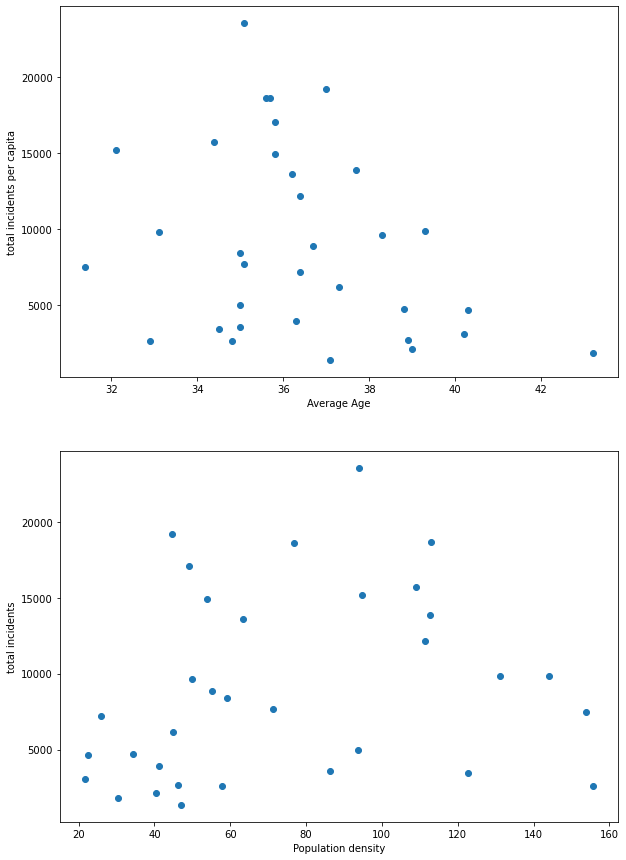

In [66]:
fig4, ax4 = plt.subplots(2, figsize = (10,15))
ax4[0].scatter(merged_2017['Average_Age,_2017'], merged_2017['total_incidents'])
ax4[0].set_ylabel('total incidents per capita')
ax4[0].set_xlabel('Average Age')
ax4[1].scatter(merged_2017['Population_density_(per_hectare)_2017'], merged_2017['total_incidents'])
ax4[1].set_ylabel('total incidents')
ax4[1].set_xlabel('Population density')

In [67]:
corrSpearman, pValSpearman = stats.spearmanr(merged_2017['total_incidents'],merged_2017['Average_Age,_2017'])
print('Mean age')
print (corrSpearman,pValSpearman)

Mean age
-0.24429399719030448 0.1706511390015933


In [68]:
corrSpearman, pValSpearman = stats.spearmanr(merged_2017['total_incidents'],merged_2017['Population_density_(per_hectare)_2017'])
print('Population_density_(per_hectare)_2017')
print (corrSpearman,pValSpearman)

Population_density_(per_hectare)_2017
0.3522727272727273 0.044368337163801064


Results discussed in report.

## 10.2 Investigating the correlation of fly-tipping with attributes recorded in 2015

In [69]:
lbp_2015 = lbp[['Code','Proportion_of_population_aged_65_and_over,_2015', 'Net_internal_migration_(2015)', 'Net_international_migration_(2015)', 'Employment_rate_(%)_(2015)', 'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)', 'Proportion_of_working_age_people_with_no_qualifications_(%)_2015','Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015', 'Jobs_Density,_2015', 'Number_of_active_businesses,_2015', 'Median_House_Price,_2015', 'Unemployment_rate_(2015)']]


In [70]:
#Use previously created 'merged_2015 dataframe' which contains population for 2015 and flytipping data.
merged_2015 = merged_2015.rename(columns={"code": "Code"})
merged_2015a = pd.merge(merged_2015, lbp_2015, on='Code')

In [71]:
merged_2015a.head()

,Code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,...,Net_internal_migration_(2015),Net_international_migration_(2015),Employment_rate_(%)_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Jobs_Density,_2015","Number_of_active_businesses,_2015","Median_House_Price,_2015",Unemployment_rate_(2015)
0,E09000001,City of London,2015-16,627.0,587.0,0.0,58.0,104.0,0.0,0.0,...,-7,665,64.6,1.6,.,.,84.3,26130,799999,.
1,E09000002,Barking and Dagenham,2015-16,2361.0,2672.0,855.0,620.0,473.0,0.0,0.0,...,-1176,2509,65.8,4.5,11.3,32.2,0.5,6560,243500,11
2,E09000003,Barnet,2015-16,5999.0,615.0,16.0,11.0,108.0,0.0,0.0,...,-3379,5407,68.5,1.9,5.2,49,0.7,26190,445000,8.5
3,E09000005,Brent,2015-16,13198.0,3980.0,296.0,400.0,282.0,1.0,1.0,...,-7739,7640,69.5,3.1,6.2,45.1,0.6,15745,407250,7.5
4,E09000006,Bromley,2015-16,3343.0,326.0,13.0,13.0,4.0,0.0,0.0,...,1342,796,75.3,2.5,4.3,46.7,0.6,15695,374975,5.3


It was previously shown in STEP 5 that in 2015, population had a stastically significant correlation to the number of fly-tipping incidents, therefore the number of fly-tipping incidents for a borough was divided by the borough's population.

In [72]:
#Dived total number of incidents by population
merged_2015a['total_incidents_pc'] = merged_2015a['total_incidents']/merged_2015a[2015]
#Columns of interest
ColofInt2015 = ['Proportion_of_population_aged_65_and_over,_2015', 'Net_internal_migration_(2015)', 'Net_international_migration_(2015)', 'Employment_rate_(%)_(2015)', 'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)', 'Proportion_of_working_age_people_with_no_qualifications_(%)_2015','Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015', 'Jobs_Density,_2015', 'Number_of_active_businesses,_2015', 'Median_House_Price,_2015', 'Unemployment_rate_(2015)']


Visual inspection shows there are '.' in columns, these will be replaced with colum means.

In [73]:
merged_2015a.head()

,Code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,...,Net_international_migration_(2015),Employment_rate_(%)_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Jobs_Density,_2015","Number_of_active_businesses,_2015","Median_House_Price,_2015",Unemployment_rate_(2015),total_incidents_pc
0,E09000001,City of London,2015-16,627.0,587.0,0.0,58.0,104.0,0.0,0.0,...,665,64.6,1.6,.,.,84.3,26130,799999,.,0.087570
1,E09000002,Barking and Dagenham,2015-16,2361.0,2672.0,855.0,620.0,473.0,0.0,0.0,...,2509,65.8,4.5,11.3,32.2,0.5,6560,243500,11,0.011667
2,E09000003,Barnet,2015-16,5999.0,615.0,16.0,11.0,108.0,0.0,0.0,...,5407,68.5,1.9,5.2,49,0.7,26190,445000,8.5,0.015795
3,E09000005,Brent,2015-16,13198.0,3980.0,296.0,400.0,282.0,1.0,1.0,...,7640,69.5,3.1,6.2,45.1,0.6,15745,407250,7.5,0.040628
4,E09000006,Bromley,2015-16,3343.0,326.0,13.0,13.0,4.0,0.0,0.0,...,796,75.3,2.5,4.3,46.7,0.6,15695,374975,5.3,0.010273


In [74]:
merged_2015a['Unemployment_rate_(2015)'][merged_2015['area'] == 'City of London']

0    .
Name: Unemployment_rate_(2015), dtype: object

In [75]:
#Replace with column means (calculated on excel)
merged_2015a.at[0, 'Unemployment_rate_(2015)'] = 6
merged_2015a.at[0, 'Proportion_of_working_age_people_with_no_qualifications_(%)_2015'] = 7.3
merged_2015a.at[0, 'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015'] = 49.4
merged_2015a.head()

,Code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,...,Net_international_migration_(2015),Employment_rate_(%)_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Jobs_Density,_2015","Number_of_active_businesses,_2015","Median_House_Price,_2015",Unemployment_rate_(2015),total_incidents_pc
0,E09000001,City of London,2015-16,627.0,587.0,0.0,58.0,104.0,0.0,0.0,...,665,64.6,1.6,7.3,49.4,84.3,26130,799999,6,0.087570
1,E09000002,Barking and Dagenham,2015-16,2361.0,2672.0,855.0,620.0,473.0,0.0,0.0,...,2509,65.8,4.5,11.3,32.2,0.5,6560,243500,11,0.011667
2,E09000003,Barnet,2015-16,5999.0,615.0,16.0,11.0,108.0,0.0,0.0,...,5407,68.5,1.9,5.2,49,0.7,26190,445000,8.5,0.015795
3,E09000005,Brent,2015-16,13198.0,3980.0,296.0,400.0,282.0,1.0,1.0,...,7640,69.5,3.1,6.2,45.1,0.6,15745,407250,7.5,0.040628
4,E09000006,Bromley,2015-16,3343.0,326.0,13.0,13.0,4.0,0.0,0.0,...,796,75.3,2.5,4.3,46.7,0.6,15695,374975,5.3,0.010273


In [76]:
for i in ColofInt2015:
    merged_2015a[i] = pd.to_numeric(merged_2015a[i], errors ='coerce')
    corrSpearman, pValSpearman = stats.spearmanr(merged_2015a['total_incidents_pc'],merged_2015a[i])
    print(i)
    print("Spearman's Rank")
    print (corrSpearman,pValSpearman)
    print("Pearson's correlation")
    corrPearson, pValPearson = stats.pearsonr(merged_2015a['total_incidents_pc'],merged_2015a[i])
    print (corrPearson,pValPearson)

Proportion_of_population_aged_65_and_over,_2015
Spearman's Rank
-0.058116255516557074 0.7603296007249576
Pearson's correlation
-0.049219712973212704 0.7961841196926845
Net_internal_migration_(2015)
Spearman's Rank
-0.4362625139043382 0.01594728329109038
Pearson's correlation
-0.2164890556364483 0.2505289909615448
Net_international_migration_(2015)
Spearman's Rank
0.3414905450500556 0.0647605499254224
Pearson's correlation
0.18458663155046443 0.32882280015316256
Employment_rate_(%)_(2015)
Spearman's Rank
-0.42434357970899805 0.019432103066675418
Pearson's correlation
-0.24038329441043343 0.2007043371273144
Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)
Spearman's Rank
0.14719971760385833 0.43761316325443256
Pearson's correlation
0.07513303639338309 0.6931432964312653
Proportion_of_working_age_people_with_no_qualifications_(%)_2015
Spearman's Rank
0.1592428604290838 0.40061108544213353
Pearson's correlation
-0.057273301580413646 0.7637073021693114
Proportion_of_working_age_with_degree

Results discussed in the report.